# Exploratory Data Analysis and Visualization

## Introduction

This notebook performs an Exploratory Data Analysis (EDA) and visualization on the dataset `final_data.csv`, which was scraped and merged in the notebooks located in the `01_data_collection` folder. For details on the data collection and merging process, refer to those notebooks.

The goal of this analysis is to uncover patterns, trends, and insights within the dataset through statistical summaries and visualizations. We will examine the data's structure, identify missing values, detect outliers, and explore relationships between variables. This EDA serves as a foundation for understanding the dataset's characteristics before the hypothesis tests.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('../data/final_data.csv')
df.head()

,name,country,gender,boulder_points,lead_points,combined_points,highest_grade,count_8c_plus,avg_grade_first5
0,Sorato Anraku,JPN,male,3835.0,2281.0,6508.0,NaN,NaN,NaN
1,Dohyun Lee,KOR,male,3708.0,2123.0,4710.0,NaN,NaN,NaN
2,Meichi Narasaki,JPN,male,3055.0,NaN,NaN,NaN,NaN,NaN
3,Sohta Amagasa,JPN,male,2967.0,NaN,NaN,NaN,NaN,NaN
4,Tomoa Narasaki,JPN,male,2459.0,415.0,2860.0,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              551 non-null    object 
 1   country           551 non-null    object 
 2   gender            551 non-null    object 
 3   boulder_points    429 non-null    float64
 4   lead_points       316 non-null    float64
 5   combined_points   195 non-null    float64
 6   highest_grade     157 non-null    float64
 7   count_8c_plus     61 non-null     float64
 8   avg_grade_first5  157 non-null    float64
dtypes: float64(6), object(3)
memory usage: 38.9+ KB


In [5]:
df.shape

(551, 9)

Our dataset has a total of **551 unique climbers** with 9 columns

#### Summary Statistics
Now let's look at the summary statistics of our dataset

In [6]:
df.describe()

,boulder_points,lead_points,combined_points,highest_grade,count_8c_plus,avg_grade_first5
count,429.000000,316.000000,195.000000,157.000000,61.000000,157.000000
mean,301.124242,372.655380,857.554872,21.847134,16.180328,19.323439
std,581.401670,643.704321,1311.443736,4.081173,51.418060,3.806938
min,1.000000,1.000000,4.000000,3.000000,1.000000,3.000000
25%,12.000000,12.000000,50.000000,20.000000,1.000000,18.000000
50%,69.000000,48.500000,237.800000,23.000000,5.000000,20.210000
75%,282.500000,421.000000,1076.750000,25.000000,12.000000,21.790000
max,3835.000000,3220.000000,6508.000000,29.000000,388.000000,25.540000


As you can see from the output, we have:

**Competition Participation:**
  - 429 climbers competed in **bouldering**
  - 316 climbers competed in **lead**
  - 195 climbers competed in **combined**

**Profile Data:**
  - Out of the 551 climbers, only **157** have an **8a.nu profile**
    - Of those, only **61** have an ascent grade of **8c+ or above**

#### Gender Distribution
Let's look at the gender distribution of our dataset

In [14]:
print("Gender Distribution:")
# Calculate gender counts and percentages
gender_counts = df['gender'].value_counts()
gender_percentages = df['gender'].value_counts(normalize=True) * 100

# Print compact output
for gender, count in gender_counts.items():
    print(f"{gender.capitalize()}: {count} climbers ({gender_percentages[gender]:.2f}%)")

Gender Distribution:
Male: 294 climbers (53.36%)
Female: 257 climbers (46.64%)


The data shows a near equal split between male and female climbers. This distribution aligns with expectations, as the IFSC strives to maintain balanced gender representation in its competitions, such as World Cups and Championships.

#### Country Distribution
Top 10 countries

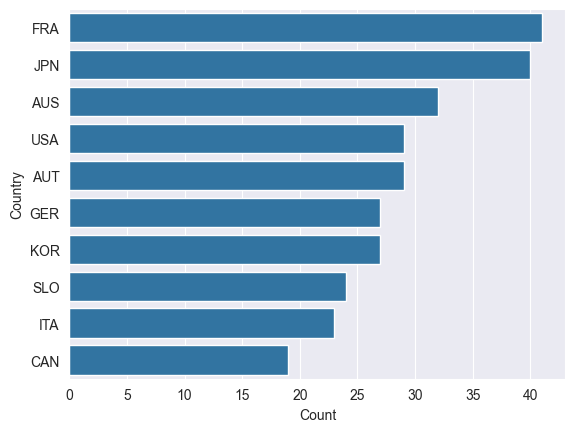

In [17]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

#### NaN Values
Percentage of NaN values in each column:

In [15]:
df.isnull().sum() / df.shape[0]

name                0.000000
country             0.000000
gender              0.000000
boulder_points      0.221416
lead_points         0.426497
combined_points     0.646098
highest_grade       0.715064
count_8c_plus       0.889292
avg_grade_first5    0.715064
dtype: float64

As we can see from the output, the data has quite high percentages of NaN values. There are two main reasons for this:
1. **Climbers not participating in specific disciplines** (boulder_points, lead_points, combined_points)
2. **Climbers not having an 8a.nu account** (highest_grade, count_8c_plus, avg_grade_first5)

Because of this, imputation is not a viable way of handling the missing values. Instead, let's segment the data into disciplines and if the climber has outdoor sports data or not.

## Discipline Specific Analysis

Let's create subsets for each discipline

In [20]:
boulder_athletes = df[df['boulder_points'] > 0]
lead_athletes= df[df['lead_points'] > 0]
combined_athletes = df[df['combined_points'] > 0]

### Bouldering
Let's start by analyzing the boulder discipline

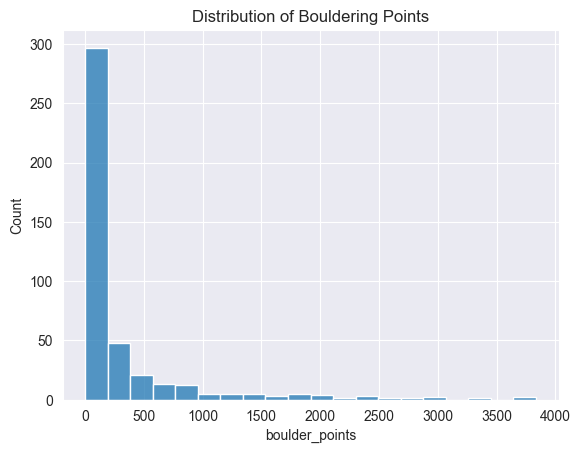

In [24]:
sns.histplot(boulder_athletes['boulder_points'], bins=20)
plt.title('Distribution of Bouldering Points')
plt.show()

The boulder_points data is very right skewed, with most values below 1000 and a few reaching as high as 3380. This reflects both performance variation and the number of competitions attended — climbers who compete more often accumulate more points, contributing to the skew.

**Other disciplines show a similar skew for the same reason.**
To handle this, let's take the log transform of the distributions

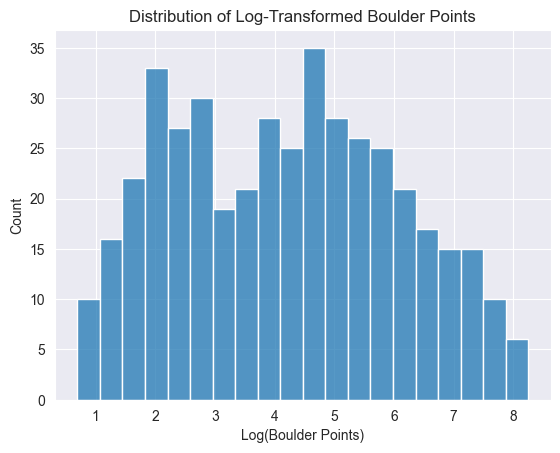

In [35]:
# Apply log transformation (add 1 to avoid log(0) issues)
boulder_athletes.loc[:, 'log_boulder_points'] = np.log1p(boulder_athletes['boulder_points'])

# Plot histogram of log-transformed data
sns.histplot(boulder_athletes['log_boulder_points'], bins=20)
plt.title('Distribution of Log-Transformed Boulder Points')
plt.xlabel('Log(Boulder Points)')
plt.show()

### Lead

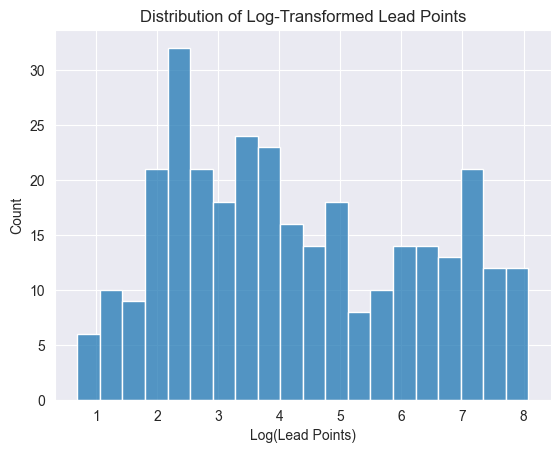

In [39]:
# Apply log transformation (add 1 to avoid log(0) issues)
lead_athletes.loc[:,'log_lead_points'] = np.log1p(lead_athletes['lead_points'])

# Plot histogram of log-transformed data
sns.histplot(lead_athletes['log_lead_points'], bins=20)
plt.title('Distribution of Log-Transformed Lead Points')
plt.xlabel('Log(Lead Points)')
plt.show()

### Combined

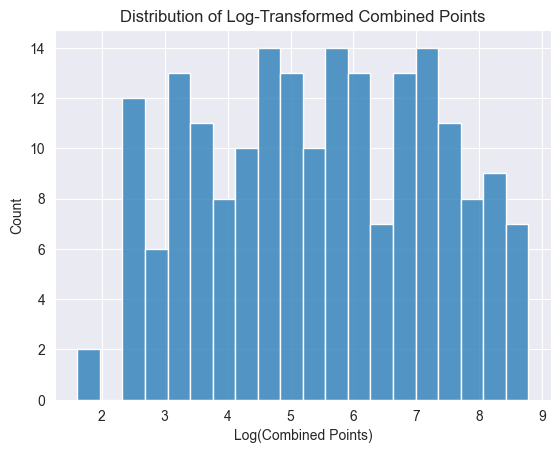

In [49]:
# Apply log transformation (add 1 to avoid log(0) issues)
combined_athletes.loc[:,'log_combined_points'] = np.log1p(combined_athletes['combined_points'])

# Plot histogram of log-transformed data
sns.histplot(combined_athletes['log_combined_points'], bins=20)
plt.title('Distribution of Log-Transformed Combined Points')
plt.xlabel('Log(Combined Points)')
plt.show()

## Relationship between disciplines
Explore relationships between variables to uncover patterns and correlations.

Compare boulder_points vs. lead_points to identify specialization.

<Axes: xlabel='boulder_points', ylabel='lead_points'>

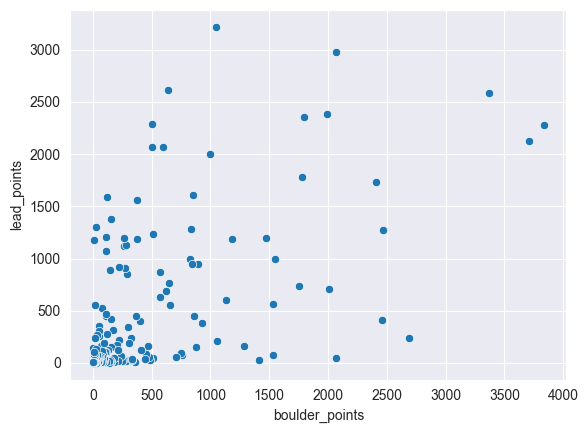

In [26]:
sns.scatterplot(x='boulder_points', y='lead_points', data=df)

Analyze combined_points vs. individual points to understand its composition.

<Axes: xlabel='lead_points', ylabel='combined_points'>

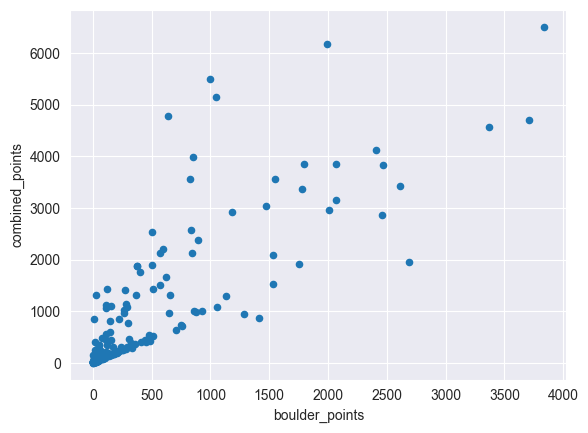

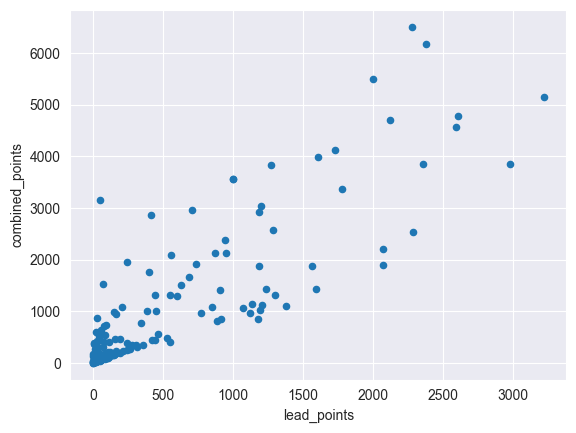

In [27]:
df.plot.scatter(x='boulder_points', y='combined_points')
df.plot.scatter(x='lead_points', y='combined_points')

### Country and Competition Performance

<Axes: xlabel='country'>

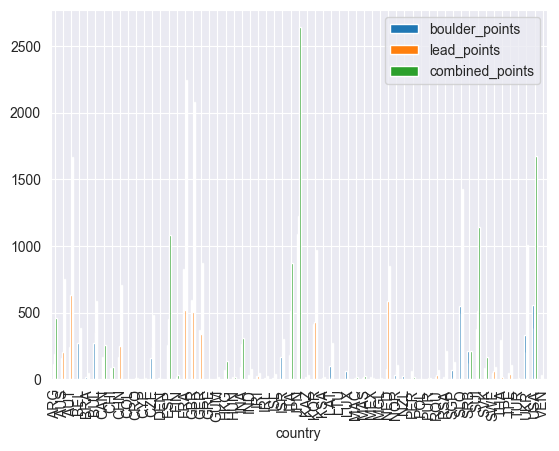

In [31]:
df.groupby('country')[['boulder_points', 'lead_points', 'combined_points']].mean().plot(kind='bar')

## Outdoor Sport Climbing Analysis

## Relationship between Competition Climbing and Outdoor Sport Climbing

Investigate if higher boulder_points or lead_points correlate with higher highest_grade or count_8c_plus.

In [29]:
df[['boulder_points', 'lead_points','combined_points', 'highest_grade', 'count_8c_plus', 'avg_grade_first5']].corr()

,boulder_points,lead_points,combined_points,highest_grade,count_8c_plus,avg_grade_first5
boulder_points,1.000000,0.594028,0.828344,0.279095,0.201801,0.327078
lead_points,0.594028,1.000000,0.867148,0.168892,0.151183,0.184891
combined_points,0.828344,0.867148,1.000000,0.291508,0.218484,0.320946
highest_grade,0.279095,0.168892,0.291508,1.000000,0.646325,0.972376
count_8c_plus,0.201801,0.151183,0.218484,0.646325,1.000000,0.585244
avg_grade_first5,0.327078,0.184891,0.320946,0.972376,0.585244,1.000000


Visualize with scatter plots or heatmaps:

<Axes: >

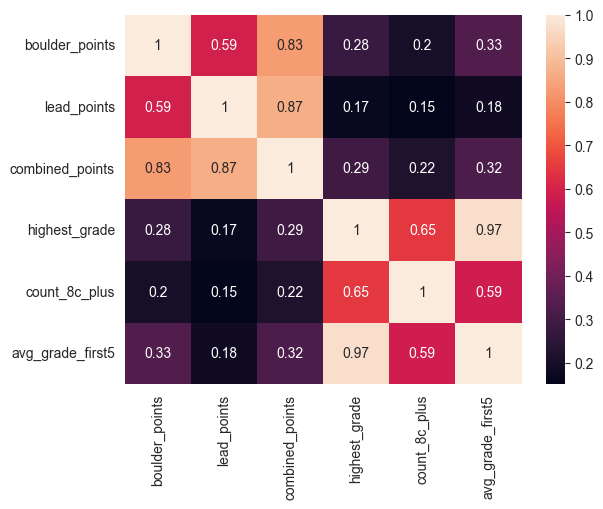

In [30]:
sns.heatmap(df[['boulder_points', 'lead_points','combined_points', 'highest_grade', 'count_8c_plus', 'avg_grade_first5']].corr(), annot=True)

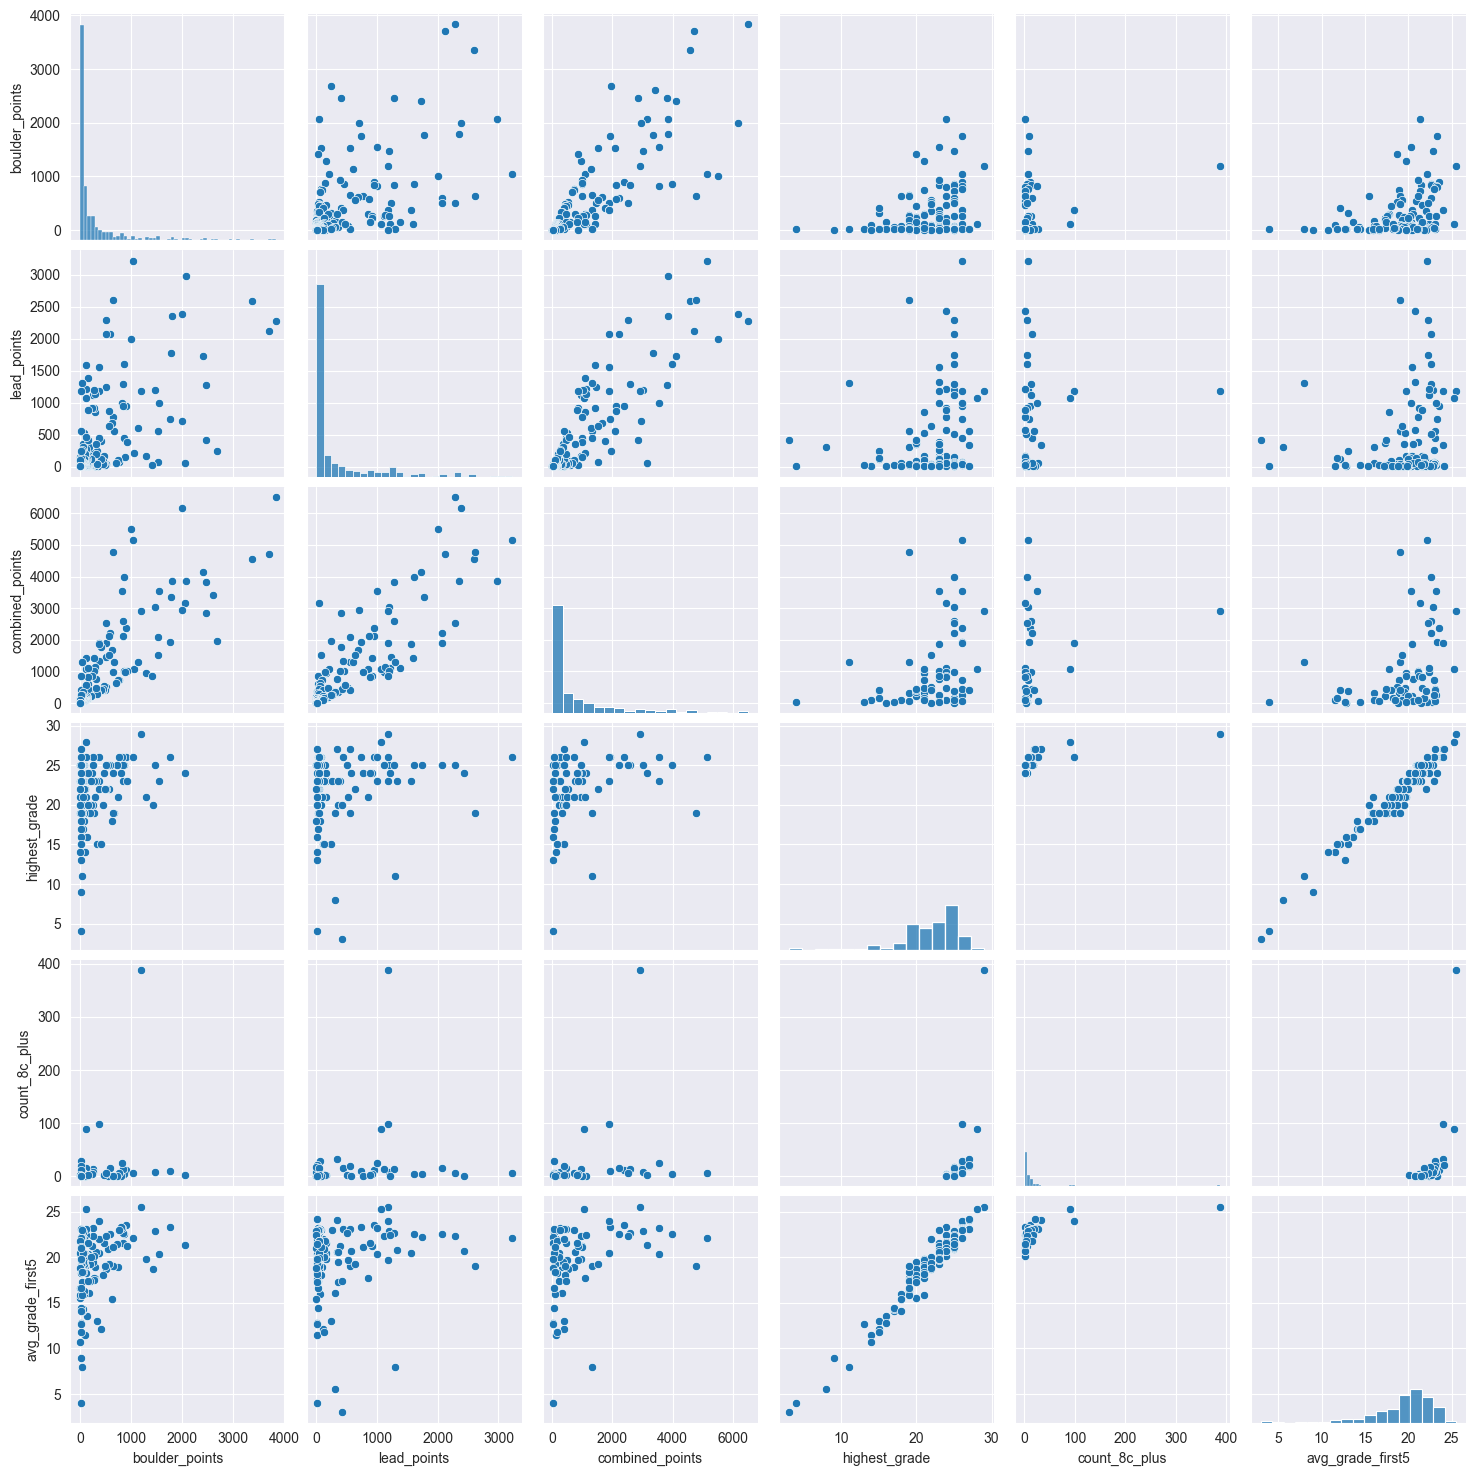

In [34]:
sns.pairplot(df[['boulder_points', 'lead_points', 'combined_points', 'highest_grade', 'count_8c_plus', 'avg_grade_first5']])